# Data analysis and visualisation: Characterising _E. coli_ proteins CsgG and CsgF for nanopore sequencing

## About this project
This project aimed to characterise the proteins CsgG and the CsgG-CsgF complex for use as nanopores for DNA sequencing, using molecular dynamics (MD) simulations. To find out more about the project, please read the published article: https://doi.org/10.1016/j.csbj.2021.11.014.

In this notebook, data obtained from MD simulations is analysed to obtain insights into properties of CsgG and the CsgG-CsgF complex that are relevant for nanopore DNA sequencing.


**Imports and settings**

In [2]:
# Built-in python libraries
import os

# Data manipulation
import numpy as np
import pandas as pd

# Data visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# Settings for Matplotlib
## plot style 
plt.style.use('seaborn-paper')

## function for adjusting colours
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.
    lighten_color('colour name', value)
    value <1= lighter, >1=darker
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

## Conformational dynamics of CsgG and the CsgG-CsgF complex

To explore the conformational behaviour of uncomplexed CsgG and in the CsgG-CsgF complex, we performed six independent MD simulations in total (2 × 200 ns and 4 × 100 ns). The simulation systems consisted of the protein embedded in a phosphatidylcholine (POPC) lipid bilayer and solvated in 1 M KCl. 

The conformational drift of the protein from the initial structure was evaluated by monitoring the **root mean square deviation (RMSD)** of the protein backbone (Cα atoms) from its initial conformation at 0 ns.

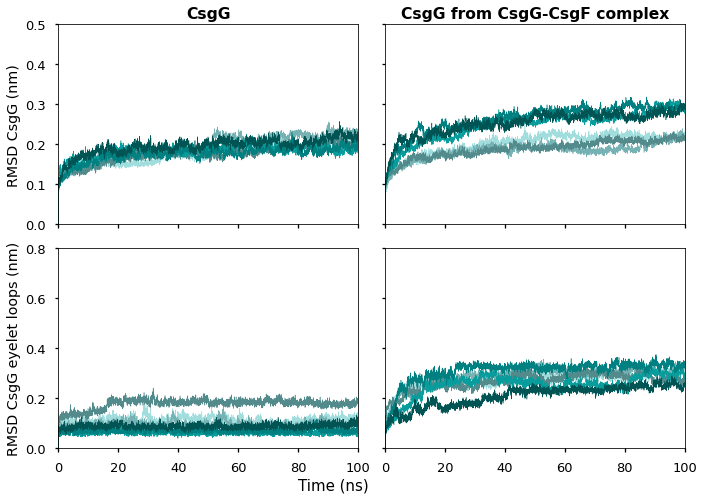

In [17]:
fig, axs=plt.subplots(2, 2, sharex='col')



#plot RMSD (nm) vs. time (ns)
## CsgG
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_0Vnm_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_0Vnm_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_0Vnm_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_0Vnm_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_0Vnm_3.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_0Vnm_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_0Vnm_2_200ns.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_0Vnm_2_200ns.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y5,color='#015454',linewidth=0.5)

axs[0, 0].set_title("CsgG", weight='bold')
axs[0, 0].set(ylabel='RMSD CsgG (nm)')
axs[0, 0].set_ylim([0, 0.5])


## CsgG eyelet
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_0Vnm_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_0Vnm_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_0Vnm_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_0Vnm_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_0Vnm_3.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_0Vnm_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_0Vnm_2_200ns.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_0Vnm_2_200ns.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y5,color='#015454',linewidth=0.5)

axs[1, 0].set(ylabel='RMSD CsgG eyelet loops (nm)')
axs[1, 0].set_ylim([0, 0.8])


## CsgG in CsgG-CsgF complex
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_0Vnm_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_0Vnm_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_0Vnm_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_0Vnm_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_0Vnm_3_200ns.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_0Vnm_3_200ns.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_0Vnm_2.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_0Vnm_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y5,color='#015454',linewidth=0.5)

axs[0, 1].set_title("CsgG from CsgG-CsgF complex", weight='bold')
axs[0, 1].set(ylabel='RMSD CsgG (nm)')
axs[0, 1].set_ylim([0, 0.5])


## CsgG eyelet in CsgG-CsgF complex
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_0Vnm_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_0Vnm_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_0Vnm_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_0Vnm_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_0Vnm_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_0Vnm_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_0Vnm_3_200ns.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_0Vnm_3_200ns.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_0Vnm_2.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_0Vnm_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y5,color='#015454',linewidth=0.5)

axs[1, 1].set(ylabel='RMSD CsgG eyelet loops (nm)')
axs[1, 1].set_ylim([0, 0.8])



#plot format
## set limits and ticks
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([0, 100])
    
## add shared axis labels
fig.text(0.5, 0.04, 'Time (ns)', ha='center', fontsize=15)

## adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show();

**Key findings:**

- CsgG exhibits reduced conformational drift when in complex with CsgF, indicated by the lower plateau RMSD of ∼ 0.22–0.30 nm, compared to uncomplexed CsgG (plateau RMSD of ∼ 0.18–0.22 nm).

- The eyelet loops forming the constriction region (residues 47–58) exhibited reduced conformational drift in uncomplexed CsgG (plateau RMSD of < 0.10 nm in 5 simulations) compared to in the CsgG-CsgF complex (plateau RMSD of ∼ 0.25–0.35 nm). 

## Stability of CsgG and the CsgG-CsgF complex under an applied electric field

DNA sequencing using nanopores requires the pores to be stable under the applied electric field that is employed to drive the movement of DNA through the pore. We next assessed the properties of uncomplexed CsgG and the CsgG-CsgF complex under applied electric fields of two strengths: 0.05 V nm−1 and 0.075 V nm−1, equivalent to 0.9 V and 1.6 V across the membrane respectively. To magnify any differences, applied electric fields that are approximately five and nine times higher respectively than 0.18 V typically used for DNA sequencing.

## Electric field: 0.05 V nm-1 (~0.9 V)
### Conformational dynamics of CsgG and the CsgG-CsgF complex

The conformational drift of the protein from the initial structure was evaluated by monitoring the **root mean square deviation (RMSD)** of the protein backbone (Cα atoms) from its initial conformation at 0 ns.

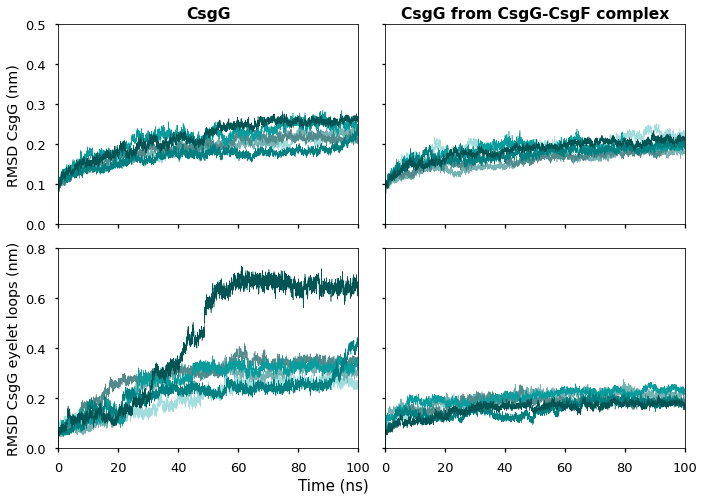

In [16]:
fig, axs=plt.subplots(2, 2, sharex='col')



#plot RMSD (nm) vs. time (ns)
## CsgG
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/csgg_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/csgg_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(time,y5,color='#015454',linewidth=0.5)

axs[0, 0].set_title("CsgG", weight='bold')
axs[0, 0].set(ylabel='RMSD CsgG (nm)')
axs[0, 0].set_ylim([0, 0.5])


## CsgG eyelet
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_6L7C/eyelet_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csgg_4UV3/eyelet_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(time,y5,color='#015454',linewidth=0.5)

axs[1, 0].set(ylabel='RMSD CsgG eyelet loops (nm)')
axs[1, 0].set_ylim([0, 0.8])


## CsgG in CsgG-CsgF complex
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/csgg_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/csgg_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(time,y5,color='#015454',linewidth=0.5)

axs[0, 1].set_title("CsgG from CsgG-CsgF complex", weight='bold')
axs[0, 1].set(ylabel='RMSD CsgG (nm)')
axs[0, 1].set_ylim([0, 0.5])


## CsgG eyelet in CsgG-CsgF complex
time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y3=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y3,color='#a2ddde',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y2,color='#76b1b3',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6L7C/eyelet_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y1,color='#538a8c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_09V_1.xvg", usecols=(0,), comments=['#','@','&'])
y4=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_09V_1.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y4,color='#099c9c',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_09V_3.xvg", usecols=(0,), comments=['#','@','&'])
y6=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_09V_3.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y6,color='teal',linewidth=0.5)

time=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_09V_2.xvg", usecols=(0,), comments=['#','@','&'])
y5=np.loadtxt("csgg_data_rattu_2021/rmsd_csggf_6SI7/eyelet_09V_2.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(time,y5,color='#015454',linewidth=0.5)

axs[1, 1].set(ylabel='RMSD CsgG eyelet loops (nm)')
axs[1, 1].set_ylim([0, 0.8])



#plot format
## set limits and ticks
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([0, 100])
    
## add shared axis labels
fig.text(0.5, 0.04, 'Time (ns)', ha='center', fontsize=15)

## adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show();

**Key findings:**

*Uncomplexed CsgG*
- The protein exhibited slightly higher deviation from its initial conformation in ~ 0.9 V (plateau RMSD of ∼ 0.20–0.27 nm) compared to in absence of electric field , due to the eyelet loops becoming more flexible (RMSD of ∼ 0.25–0.40 nm by 100 ns in 5 simulations).
- Up to two eyelet loops were observed to move upwards into the vestibule of uncomplexed CsgG to varying degrees. 
- In one simulation, an eyelet loop flipped upwards during ∼ 48–60 ns, and the RMSD of the eyelet loop region during this period increased from ∼ 0.48 nm to ∼ 0.65 nm. The loop conformation remained unchanged following this, hence the RMSD plateaued to ∼ 0.65 nm by 100 ns. 
- The RMSD of uncomplexed CsgG fluctuated very little during ~ 50-100 ns. This indicates that the the flipping of the eyelet loop did not affect the protein conformation nor stability in a significant way. 

*CsgG-CsgF complex*
- CsgG eyelet loops did not flip when CsgF is present. The RMSD remained between ~ 0.16 nm to ~ 0.24 nm and fluctuated very little during ~ 20-100 ns, indicating that the eyelet loops' conformations did not greatly change in ~ 0.9 V.
- Interestingly, CsgG exhibited less conformational drift from its initial structure in ~ 0.9 V (plateau RMSD of ∼ 0.17–0.23 nm) compared to in the absence of an electric field. 

### Change in pore geometry under an applied electric field
To quantify the changes in nanopore geometry, **pore radius profiles** of uncomplexed CsgG was generated at regular intervals (15 ns, 25 ns, 35 ns, and 45 ns) and compared to starting structure (0 ns). Pore radius profiles were calculated using HOLE [1].

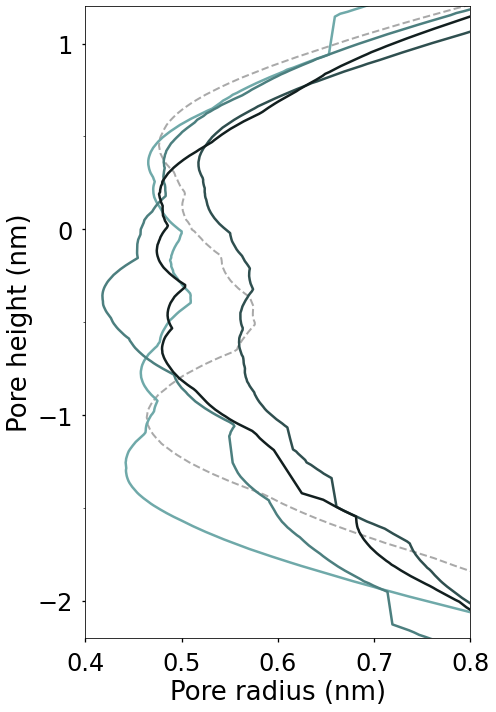

In [22]:
# set plot style 
plt.style.use('seaborn-talk')

fig, ax=plt.subplots(figsize = (7,10))



# axes properties
def axis():
    plt.xlim(0.4,0.8)
    plt.ylim(-2.2,1.2)
    plt.xlabel('Pore radius (nm)', fontsize = 26,color='black')
    plt.ylabel('Pore height (nm)', fontsize = 26,color='black')
    plt.xticks(fontsize=24,color='black')
    plt.yticks(fontsize=24,color='black')
    locx = ticker.MultipleLocator(base=0.1)
    locy = ticker.MultipleLocator(base=1)
    minx = ticker.MultipleLocator(base=0.1)
    miny = ticker.MultipleLocator(base=0.5)
    ax.xaxis.set_major_locator(locx)
    ax.yaxis.set_major_locator(locy)
    ax.xaxis.set_minor_locator(minx)
    ax.yaxis.set_minor_locator(miny)  

# plot pore radius profiles
## O ns
a=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/0ns.dat', delimiter=' ', usecols=(1,), comments=['#','@','&'])
x=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/0ns.dat', delimiter=' ', usecols=(0,), comments=['#','@','&'])
ax.plot(x,a,color='darkgray',linewidth = 2, linestyle='--')
axis()

## 15 ns
b=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/15ns.dat', delimiter=' ', usecols=(1,), comments=['#','@','&'])
x=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/15ns.dat', delimiter=' ', usecols=(0,), comments=['#','@','&'])
ax.plot(x,b,color=lighten_color('darkslategray', 0.6),linewidth = 2.5)
axis()

## 25 ns
c=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/25ns.dat', delimiter=' ', usecols=(1,), comments=['#','@','&'])
x=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/25ns.dat', delimiter=' ', usecols=(0,), comments=['#','@','&'])
ax.plot(x,c,color=lighten_color('darkslategray', 0.8),linewidth = 2.5)
axis()

## 35 ns
d=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/35ns.dat', delimiter=' ', usecols=(1,), comments=['#','@','&'])
x=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/35ns.dat', delimiter=' ', usecols=(0,), comments=['#','@','&'])
ax.plot(x,d,color=lighten_color('darkslategray', 1),linewidth = 2.5)
axis()

## 45 ns
e=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/45ns.dat', delimiter=' ', usecols=(1,), comments=['#','@','&'])
x=np.loadtxt('csgg_data_rattu_2021/csgg_4UV3_09V_sim3_pore_radius/45ns.dat', delimiter=' ', usecols=(0,), comments=['#','@','&'])
ax.plot(x,e,color=lighten_color('darkslategray', 1.2),linewidth = 2.5)
axis()



# plot format
plt.tight_layout()
plt.show();

**Key findings:**

In the absence of CsgF, the eyelet loops forming the CsgG constriction region were observed to ‘flip’ upwards into the vestibule to varying degrees under an applied electric field. Although this does not impact the protein’s conformation or stability, it perturbs the geometry of the constriction region.

it is imperative that the nanopores used for DNA sequencing have a stable geometry to ensure a steady ionic current through the pore so that the changes in current during translocation can be associated with the DNA only. The stochastic nature of the behaviour of the eyelet loops is likely to interfere with the application of CsgG as a nanopore for DNA sequencing [204]. It is of great interest to eliminate or reduce the intrinsic activity of the CsgG eyelet loops for optimising the protein pore for DNA sequencing. 

### Change in CsgG dynamics under an applied electric field
The impact of the flipping of the eyelet loops on the dynamics of CsgG was ascertained by **Principal component analysis (PCA)**. PCA is a linear dimension-reduction method that extracts global collective motions of the protein by mapping its coordinates to a linear combination of orthogonal vectors known as principal components (PCs). 
The motions of the CsgG backbone in 0.9 V were characterised before and following the flipping of the eyelet loops (referred to as ‘pre-eyelet loop flipping’ and ‘post-eyelet loop flipping’ from here on). The first ten principal components (PCs) were sufficient to describe > 90 % of the total backbone fluctuations of the protein.

#### Porcupine plots
The motions described by the 1st PC are visualised on CsgG, using PyMOL Modevectors [2]. The direction and the width of the arrows represent the direction and movement (> 0.3 nm) of the CsgG domains. 

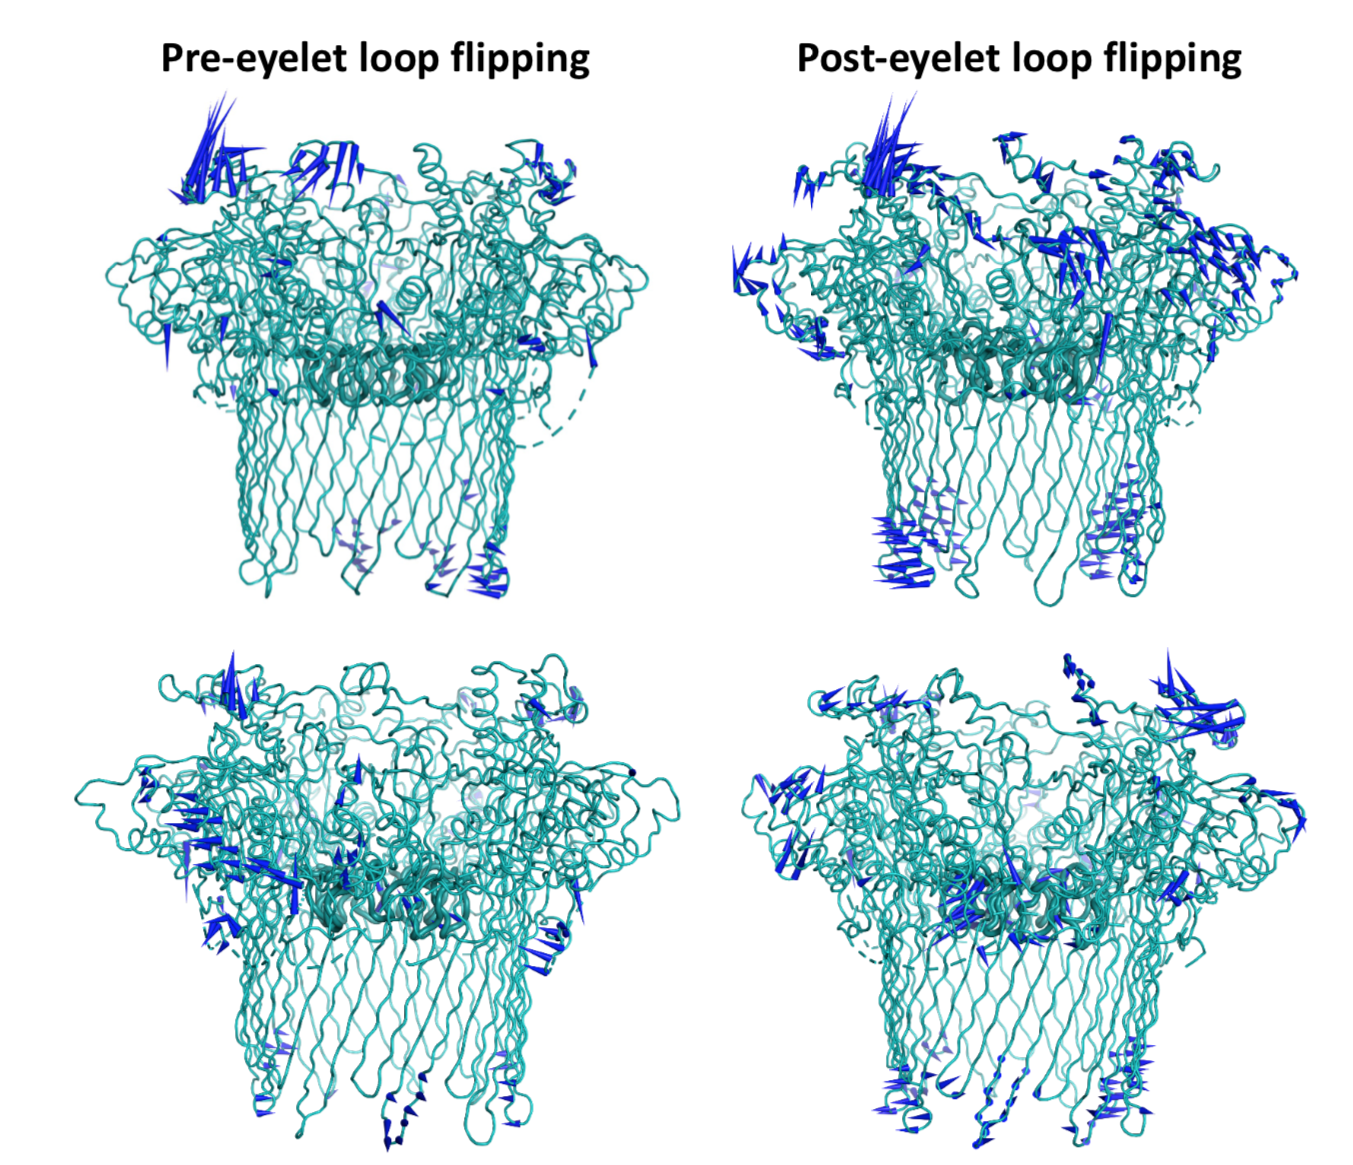

**Key findings:**

The porcupine plots show the direction and the magnitude of the movement of CsgG domains described by the 1st PC, which accounts for the most variance, i.e., the largest uncorrelated motion observed. The 1st PC accounts for ~ 45 % and ~52 % of the variance for pre- and post-eyelet loop flipping, respectively. The movement of the loops forming the vestibule mouth, the loops near the C termini in the vestibule region, and the short turns of the β-barrel dominated the dynamics of CsgG, both pre- and post-eyelet loop flipping. The direction and the scale of these motions varied amongst independent simulations; however, generally, more monomers were observed to participate in these motions post-eyelet loop flipping. 

#### Projection of the conformations of CsgG on the subspace spanned by the first two PCs

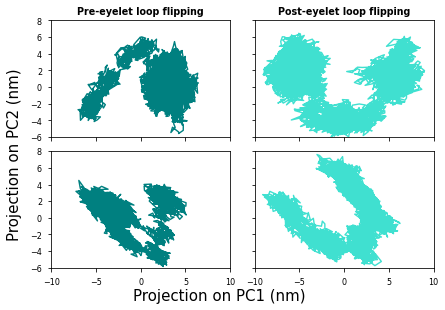

In [6]:
fig, axs=plt.subplots(2, 2, sharex='col')



# axes properties
def axis():
    plt.xticks(fontsize=15,color='black')
    plt.yticks(fontsize=15,color='black')
    plt.xlim(-10,10)
    plt.ylim(-6,8)
    locx = ticker.MultipleLocator(base=2)
    locy = ticker.MultipleLocator(base=2)
    ax.xaxis.set_major_locator(locx)
    ax.yaxis.set_major_locator(locy)

# plot projection on 1st and 2nd PCs
s1e1=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_before_loop_flip_0-23ns_simulation1.xvg", usecols=(0,), comments=['#','@','&'])
s1e2=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_before_loop_flip_0-23ns_simulation1.xvg", usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(s1e1,s1e2,color='teal')
axs[0, 0].set_title("Pre-eyelet loop flipping", weight='bold')

s2e1=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_before_loop_flip_0-21ns_simulation2.xvg", usecols=(0,), comments=['#','@','&'])
s2e2=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_before_loop_flip_0-21ns_simulation2.xvg", usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(s2e1,s2e2,color='teal')

s1e1=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_after_loop_flip_23-100ns_simulation1.xvg", usecols=(0,), comments=['#','@','&'])
s1e2=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_after_loop_flip_23-100ns_simulation1.xvg", usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(s1e1,s1e2,color='turquoise')
axs[0, 1].set_title("Post-eyelet loop flipping", weight='bold')

s2e1=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_after_loop_flip_21-100ns_simulation2.xvg", usecols=(0,), comments=['#','@','&'])
s2e2=np.loadtxt("csgg_data_rattu_2021/PCA_csgg_4UV3_09V/2dproj_after_loop_flip_21-100ns_simulation2.xvg", usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(s2e1,s2e2,color='turquoise')



# plot format
## set limits and ticks
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-10,10])
    ax.set_ylim([-6,8])

## add shared axis labels
fig.text(0.5, 0.04, 'Projection on PC1 (nm)', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Projection on PC2 (nm)', va='center', rotation='vertical', fontsize=15)

## adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show();

**Key findings:**

The conformations of CsgG projected on the subspace spanned by the first two PCs show that the protein was able to explore more of the conformational space post-eyelet loop flipping. These results indicate that CsgG is more conformationally labile following the flipping of the eyelet loops.

## Electric field: 0.075 V nm-1 (~1.6 V)

### CsgG is unstable in ~1.6 V

Visual analysis of the MD simulation shows that two of the nine monomers separate in the CsgG transmembrane β-barrel. This separation was quantified by measuring the distances between residues in the two monomers. 

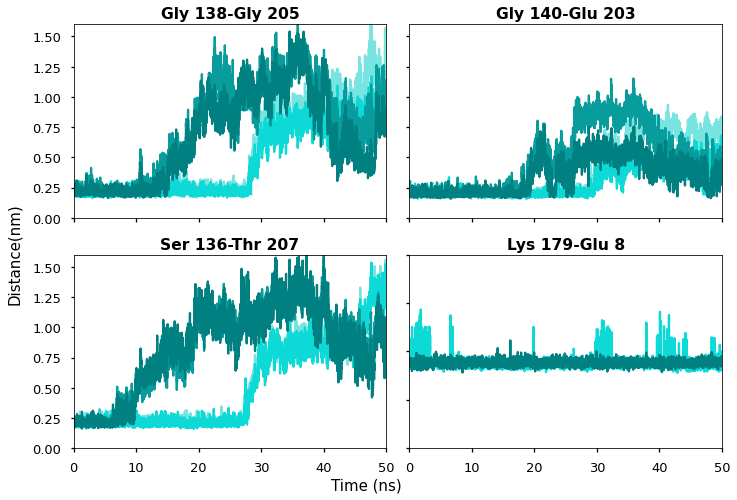

In [30]:
fig, axs=plt.subplots(2, 2, sharex='col')



# plot distance between interacting residues over time
## G138-G205
x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/G138NH_G205O.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/G138NH_G205O.xvg",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/G138O_G205NH.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(x,y1,color='#77e4e2')
axs[0, 0].plot(x,y2,color='#0dd9d7')

x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/G138NH_G205O.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/G138NH_G205O.xvg",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/G138O_G205NH.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 0].plot(x,y1,color='#099c9c')
axs[0, 0].plot(x,y2,color='teal')

axs[0, 0].set_title("Gly 138-Gly 205", weight='bold')
axs[0, 0].set_xlim([0, 50])
axs[0, 0].set_ylim([0, 1.6])

## G140-E203
x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/G140NH_E203O.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/G140NH_E203O.xvg",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/G140O_E203NH.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(x,y1,color='#77e4e2')
axs[0, 1].plot(x,y2,color='#0dd9d7')

x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/G140NH_E203O.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/G140NH_E203O.xvg",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/G140O_E203NH.xvg",usecols=(1,), comments=['#','@','&'])
axs[0, 1].plot(x,y1,color='#099c9c')
axs[0, 1].plot(x,y2,color='teal')

axs[0, 1].set_title("Gly 140-Glu 203", weight='bold')
axs[0, 1].set_xlim([0, 50])
axs[0, 1].set_ylim([0, 1.6])

## S136-T207
x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/S136NH_T207O.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/S136NH_T207O.xvg",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/S136O_T207NH.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(x,y1,color='#77e4e2')
axs[1, 0].plot(x,y2,color='#0dd9d7')

x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/S136NH_T207O.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/S136NH_T207O.xvg",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/S136O_T207NH.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 0].plot(x,y1,color='#099c9c')
axs[1, 0].plot(x,y2,color='teal')

axs[1, 0].set_title("Ser 136-Thr 207", weight='bold')
axs[1, 0].set_xlim([0, 50])
axs[1, 0].set_ylim([0, 1.6])

#K179-E8
x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/K179N_E8C.xvg",usecols=(0,), comments=['#','@','&'])
y1=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/6L7C_sim3/K179N_E8C.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(x,y1,color='#0dd9d7')

x=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/K179N_E8C.xvg",usecols=(0,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csgg_interactions_0075Vnm/4UV3_sim2/K179N_E8C.xvg",usecols=(1,), comments=['#','@','&'])
axs[1, 1].plot(x,y2,color='teal')

axs[1, 1].set_title("Lys 179-Glu 8", weight='bold')
axs[1, 1].set_xlim([0, 50])
axs[1, 1].set_ylim([0, 0.8])



# plot format
## set limits and ticks
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([0, 50])

## add shared axis labels
fig.text(0.5, 0.04, 'Time (ns)', ha='center', fontsize=15)
fig.text(0.02, 0.5, 'Distance(nm)', va='center', rotation='vertical', fontsize=15)

## adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show();

The distance over time is plotted between backbone atoms that form inter-monomer hydrogen bonds (Gly 138-Gly 205, Gly 140-Glu 203, and Ser 136-Thr 207), and between carboxylate and ammonium groups of glutamate and lysine residues (Lys 179- Glu 8). Data is from two independent simulations, shown in teal and cyan. 


**Key findings:**
- The hydrogen bonds between the backbone atoms at the interface of β-sheets of two monomers break within 20-30 ns in all independent simulations, indicated by significant increase in distance between interacting atoms (Gly 138-Gly 205 and Ser 136-Thr 207).
- However, interactions between monomers persisted in the vestibule region;
    - Electrostatic interactions between Glu-8 in the N-terminus of monomer 1 and Lys-179 of monomer 2 persisted for as long as 50 ns in all simulations. 
    - The sidechain of Lys-179 also forms a salt bridge with Glu-210 in the same monomer, which likely contributes to the stability of the interaction between the two monomers. 
    - The N-terminus of monomer 1 remained wrapped around the adjacent monomer 2, in a similar conformation to that adopted in stable CsgG.

### CsgG-CsgF complex is stable in ~1.6 V

CsgG is stable in the CsgG-CsgF complex, due to CsgF residues forming a network of interactions (hydrogen bonds and electrostatic interactions) with residues in CsgG β-barrel.

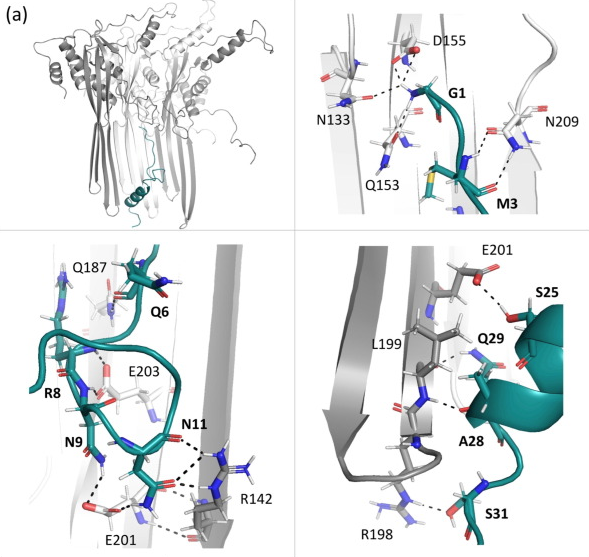

#### Number of monomer pairs (CsgG and CsgF) forming hydrogen bonds over time

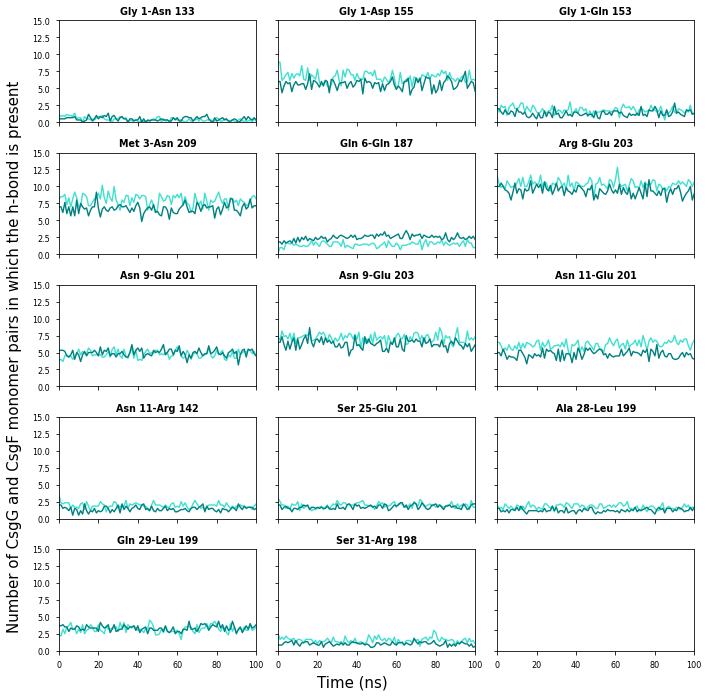

In [5]:
fig, axs=plt.subplots(5, 3, sharex='col', figsize=(10,10))



time_ps=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/S31-R198.dat",usecols=(0,), comments=['#','@','&'])
time_ns=(np.split(time_ps, 6))[0]

def mean_hbonds(x):
    z=np.split(x, 6)
    x=np.mean(z, axis=0)
    return(x)

## G1-N133
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/G1-N133.dat",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/G1-N133.dat",usecols=(1,), comments=['#','@','&'])
y1=mean_hbonds(y1)
y2=mean_hbonds(y2)
axs[0, 0].plot(time_ns,y1,color='turquoise')
axs[0, 0].plot(time_ns,y2,color='teal')

axs[0, 0].set_title("Gly 1-Asn 133", weight='bold')
axs[0, 0].set_xlim([0, 100])
axs[0, 0].set_ylim([0, 15])

## G1-D155
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/G1-D155.dat",usecols=(1,), comments=['#','@','&'])
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/G1-D155.dat",usecols=(1,), comments=['#','@','&'])
y1=mean_hbonds(y1)
y2=mean_hbonds(y2)
axs[0, 1].plot(time_ns,y1,color='turquoise')
axs[0, 1].plot(time_ns,y2,color='teal')

axs[0, 1].set_title("Gly 1-Asp 155", weight='bold')
axs[0, 1].set_xlim([0, 100])
axs[0, 1].set_ylim([0, 15])

## G1-Q153
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/G1-Q153.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/G1-Q153.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[0, 2].plot(time_ns,y1,color='turquoise')
axs[0, 2].plot(time_ns,y2,color='teal')

axs[0, 2].set_title("Gly 1-Gln 153", weight='bold')
axs[0, 2].set_xlim([0, 100])
axs[0, 2].set_ylim([0, 15])

## M3-N209
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/M3-N209.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/M3-N209.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[1, 0].plot(time_ns,y1,color='turquoise')
axs[1, 0].plot(time_ns,y2,color='teal')

axs[1, 0].set_title("Met 3-Asn 209", weight='bold')
axs[1, 0].set_xlim([0, 100])
axs[1, 0].set_ylim([0, 15])

## Q6-Q187
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/Q6-Q187.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/Q6-Q187.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[1, 1].plot(time_ns,y1,color='turquoise')
axs[1, 1].plot(time_ns,y2,color='teal')

axs[1, 1].set_title("Gln 6-Gln 187", weight='bold')
axs[1, 1].set_xlim([0, 100])
axs[1, 1].set_ylim([0, 15])

## R8-E203
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/R8-E203.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/R8-E203.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[1, 2].plot(time_ns,y1,color='turquoise')
axs[1, 2].plot(time_ns,y2,color='teal')

axs[1, 2].set_title("Arg 8-Glu 203", weight='bold')
axs[1, 2].set_xlim([0, 100])
axs[1, 2].set_ylim([0, 15])

## N9-E201
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/N9-E201.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/N9-E201.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[2, 0].plot(time_ns,y1,color='turquoise')
axs[2, 0].plot(time_ns,y2,color='teal')

axs[2, 0].set_title("Asn 9-Glu 201", weight='bold')
axs[2, 0].set_xlim([0, 100])
axs[2, 0].set_ylim([0, 15])

## N9-E203
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/N9-E203.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/N9-E203.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[2, 1].plot(time_ns,y1,color='turquoise')
axs[2, 1].plot(time_ns,y2,color='teal')

axs[2, 1].set_title("Asn 9-Glu 203", weight='bold')
axs[2, 1].set(ylabel='No. of hydrogen bonds')
axs[2, 1].set_xlim([0, 100])
axs[2, 1].set_ylim([0, 15])

## N11-E201
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/N11-E201.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/N11-E201.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[2, 2].plot(time_ns,y1,color='turquoise')
axs[2, 2].plot(time_ns,y2,color='teal')

axs[2, 2].set_title("Asn 11-Glu 201", weight='bold')
axs[2, 2].set_xlim([0, 100])
axs[2, 2].set_ylim([0, 15])

## N11-R142
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/N11-R142.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/N11-R142.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[3, 0].plot(time_ns,y1,color='turquoise')
axs[3, 0].plot(time_ns,y2,color='teal')

axs[3, 0].set_title("Asn 11-Arg 142", weight='bold')
axs[3, 0].set_xlim([0, 100])
axs[3, 0].set_ylim([0, 15])

## S25-E201
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/S25-E201.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/S25-E201.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[3, 1].plot(time_ns,y1,color='turquoise')
axs[3, 1].plot(time_ns,y2,color='teal')

axs[3, 1].set_title("Ser 25-Glu 201", weight='bold')
axs[3, 1].set_xlim([0, 100])
axs[3, 1].set_ylim([0, 15])

## A28-L199
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/A28-L199.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/A28-L199.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)

axs[3, 2].plot(time_ns,y1,color='turquoise')
axs[3, 2].plot(time_ns,y2,color='teal')

axs[3, 2].set_title("Ala 28-Leu 199", weight='bold')
axs[3, 2].set_xlim([0, 100])
axs[3, 2].set_ylim([0, 15])

## Q29-L199
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/Q29-L199.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/Q29-L199.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[4, 0].plot(time_ns,y1,color='turquoise')
axs[4, 0].plot(time_ns,y2,color='teal')

axs[4, 0].set_title("Gln 29-Leu 199", weight='bold')
axs[4, 0].set_xlim([0, 100])
axs[4, 0].set_ylim([0, 15])

## S31-R198
y1=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0V/S31-R198.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y1, 6)
y1=np.mean(y, axis=0)
y2=np.loadtxt("csgg_data_rattu_2021/csggf_6SI7_numhbonds_0075Vnm/S31-R198.dat",usecols=(1,), comments=['#','@','&'])
y=np.split(y2, 6)
y2=np.mean(y, axis=0)
axs[4, 1].plot(time_ns,y1,color='turquoise')
axs[4, 1].plot(time_ns,y2,color='teal')

axs[4, 1].set_title("Ser 31-Arg 198", weight='bold')
axs[4, 1].set_xlim([0, 100])
axs[4, 1].set_ylim([0, 15])


# plot format
## set limits and ticks
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([0, 100])

## add shared axis labels
fig.text(0.5, 0.04, 'Time (ns)', ha='center', fontsize=15)
fig.text(0.02, 0.5, 'Number of CsgG and CsgF monomer pairs in which the h-bond is present', va='center', rotation='vertical', fontsize=15)

## adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show();


**Key findings:**

The number of CsgF and CsgG monomer pairs in the CsgG-CsgF complex forming a given hydrogen bond over 100 ns simulation is plotted above, in 0 V (turquoise) and 0.075 Vnm-1 (teal). 

MD simulations revealed that the interactions between CsgG and CsgF reported in the experimental structure were not present in all monomer pairs in 0.075 V nm-1. These include hydrogen bonds between CsgF Gly-1 and CsgG Asn-133 or Gln-153 residues, CsgF Thr-2 or Thr-4 and CsgG Thr-207, and CsgF Gln-6 and CsgG Gln-187 residues. 

The electric field results in additional interactions taking place between CsgG and CsgF, which are absent in the experimental structure. These include hydrogen bonds between residues in the CsgF C terminus and near the CsgG β-barrel exit; consequently, the short turns of the β-barrel (residues 191-198) remained ordered, with RMSF similar to when in 0 V and 0.05 V nm-1.

## Conclusions

In conclusion, we find that the conformational behaviour of CsgG when uncomplexed and in the CsgG-CsgF complex differs under an applied electric field. The eyelet loops forming the CsgG constriction region are observed to be more flexible in uncomplexed CsgG compared to in CsgG-CsgF complex under an applied electric field. Eyelet loops ‘flip’ upwards into the vestibule of uncomplexed CsgG to varying degrees, while not impacting the protein conformation and stability. The presence of CsgF stabilises the conformation of the eyelet loops and prevents large loop motion in the presence of an electric field in the CsgG-CsgF complex. Uncomplexed CsgG is unstable in high electric strengths, due to the disruption of hydrogen bonds between β-sheets of two monomers which leads to separation of the monomers in the CsgG transmembrane β-barrel. However, the CsgG-CsgF complex remains stable due to the residues of the CsgG transmembrane β-barrel forming a network of hydrogen bonds and electrostatic interactions with CsgF monomers.

To find out more about this study, please read the published article: https://doi.org/10.1016/j.csbj.2021.11.014.

## References

1. O.S. Smart, J.G. Neduvelil, X. Wang, B.A. Wallace, M.S. Sansom J Mol Graph, 14 (354–360) (1996), p. 376.
2. Sean M. Law https://pymolwiki.org/index.php/Modevectors